In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
from P03_run_diff_sigma.T00_lib.utils import check_jupyter


In [22]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent / "T02_combine_features"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_run_diff_sigma/T02_combine_features"
    CURRENT_DIR = Path(__file__).resolve().parent

Code is running in a Jupyter environment.


In [23]:
df = pd.read_excel(CURRENT_DIR / "S03_calculate_performance.xlsx")

In [24]:
df

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test
0,1,0.3,RandomForest,Y-1,0.640984,1.006845,1.723643,1.414863,0.359016,0.212380
1,1,0.3,RandomForest,Y-2,0.803981,0.871398,1.363509,4.329256,0.196019,-0.062648
2,1,0.3,RandomForest,Y-3,0.451175,0.499226,1.308137,1.353460,0.548825,0.414735
3,1,0.3,RandomForest,Y-All,0.632047,0.792490,1.465096,2.365860,0.367953,0.188156
4,2,0.3,RandomForest,Y-1,0.633305,0.667720,1.750694,1.490076,0.366695,0.234716
5,2,0.3,RandomForest,Y-2,0.762071,0.993721,1.457536,1.596061,0.237929,-0.110847
6,2,0.3,RandomForest,Y-3,0.454547,0.580230,1.811273,1.140297,0.545453,0.474365
7,2,0.3,RandomForest,Y-All,0.616641,0.747224,1.673168,1.408811,0.383359,0.199411
8,3,0.3,RandomForest,Y-1,0.524093,0.964174,1.370628,2.112457,0.475907,0.143175
9,3,0.3,RandomForest,Y-2,0.763535,0.929720,1.589805,3.191330,0.236465,-0.008876


<Axes: xlabel='model', ylabel='R2 Test'>

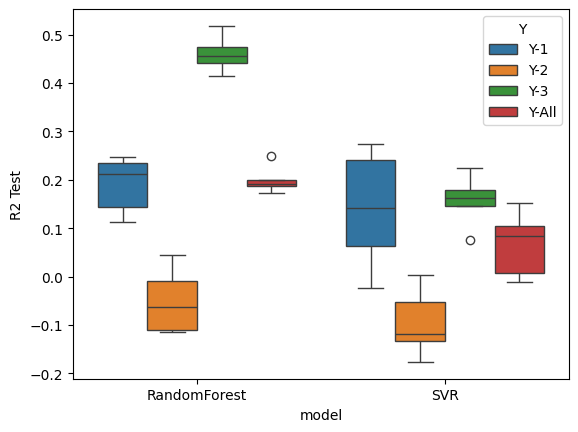

In [25]:
sns.boxplot(df, x="model", y="R2 Test", hue="Y")